In [5]:
import projet_etu
import importlib
importlib.reload(projet_etu) 
from projet_etu import *
from mltools import *

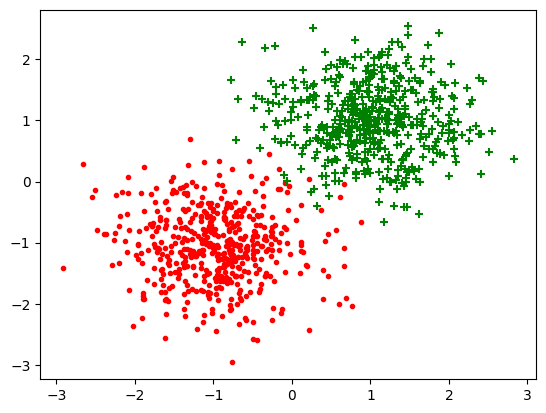

In [2]:
x_train, y_train = gen_arti(data_type=0, epsilon=0.5)
x_test, y_test = gen_arti(nbex=2000, data_type=0, epsilon=0.6)
n = x_train.shape[1]
d = 1
y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))
plot_data(x_train, y_train)
plt.show()

Accuracy en train : 0.992
Accuracy en test : 0.982


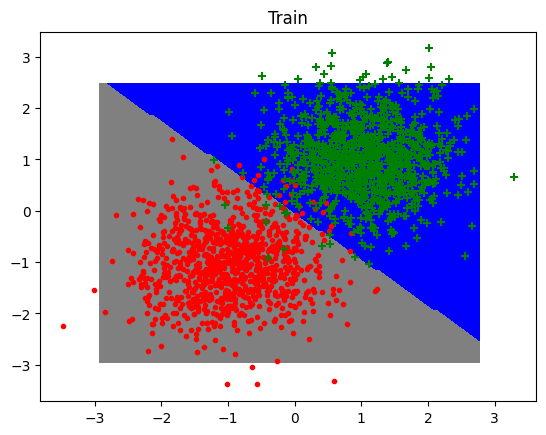

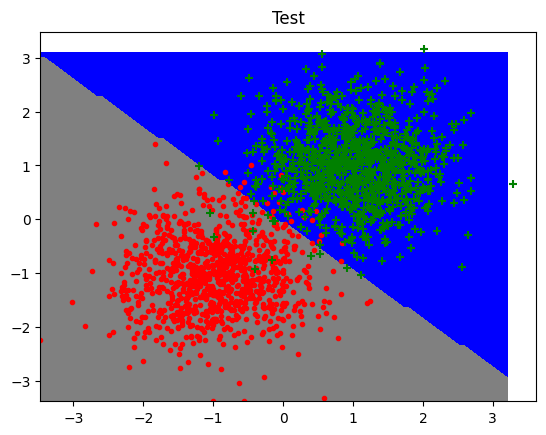

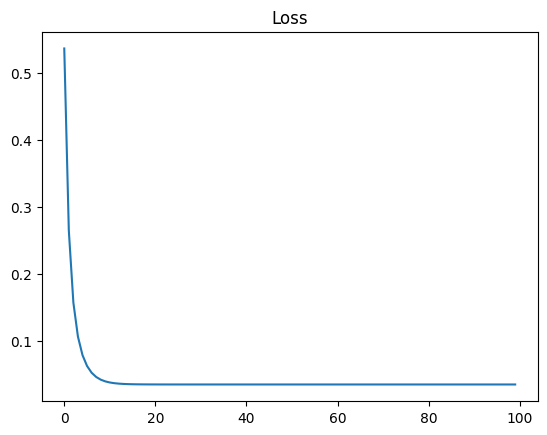

In [3]:
nb_itr = 100
learning_rate = 1e-4
loss = MSELoss()
lineaire = Linear(n, d)
all_loss = [] 


for i in range(nb_itr):
    # forward
    z = lineaire.forward(x_train)
    current_loss = loss.forward(y_train, z)
    all_loss.append(current_loss)

    # backward
    loss_back = loss.backward(y_train, z)
    delta = lineaire.backward_delta(x_train, loss_back)
    # on a que 1 couche donc on peut directement mettre à jour les paramètres en utilisant loss_back
    lineaire.backward_update_gradient(x_train, loss_back)
    lineaire.update_parameters(learning_rate)
    lineaire.zero_grad()
    

acc_train = (y_train == lineaire.predict(x_train)).mean()
acc_test = (y_test == lineaire.predict(x_test)).mean()
print(f"Accuracy en train : {acc_train}")
print(f"Accuracy en test : {acc_test}")


plot_frontiere(x_train, lineaire.predict, step=100)
plot_data(x_test, y_test.reshape(-1,1))
plt.title("Train")
plt.show()

plot_frontiere(x_test, lineaire.predict, step=100)
plot_data(x_test, y_test.reshape(-1,1))
plt.title("Test")
plt.show()

plt.plot(all_loss)
plt.title("Loss")
plt.show()

